In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as tsa 
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
energy = pd.read_csv("https://raw.githubusercontent.com/cjfghk5697/forecastsolar/main/csv%20file/energy.csv") # 발전소별 발전량 

In [3]:
energy.dtypes

time                  object
dangjin_floating     float64
dangjin_warehouse    float64
dangjin                int64
ulsan                  int64
dtype: object

In [4]:
energy['date'] = energy['time'].apply(lambda x: x.split()[0])
energy['time'] = energy['time'].apply(lambda x: x.split()[1])
energy['time'] = energy['time'].str.rjust(8,'0') # 한자릿수 시간 앞에 0 추가 ex) 3시 -> 03시

# 24시를 00시로 바꿔주기
energy.loc[energy['time']=='24:00:00','time'] = '00:00:00'
energy['time'] = energy['date'] + ' ' + energy['time']
energy['time'] = pd.to_datetime(energy['time'])
energy.loc[energy['time'].dt.hour==0,'time'] += timedelta(days=1)

In [32]:
energy.index = energy.time

In [35]:
energy

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan,date
time,,,,,,
2018-03-01 01:00:00,2018-03-01 01:00:00,0.0,0.0,0,0,2018-03-01
2018-03-01 02:00:00,2018-03-01 02:00:00,0.0,0.0,0,0,2018-03-01
2018-03-01 03:00:00,2018-03-01 03:00:00,0.0,0.0,0,0,2018-03-01
2018-03-01 04:00:00,2018-03-01 04:00:00,0.0,0.0,0,0,2018-03-01
2018-03-01 05:00:00,2018-03-01 05:00:00,0.0,0.0,0,0,2018-03-01
...,...,...,...,...,...,...
2021-01-31 20:00:00,2021-01-31 20:00:00,0.0,0.0,0,0,2021-01-31
2021-01-31 21:00:00,2021-01-31 21:00:00,0.0,0.0,0,0,2021-01-31
2021-01-31 22:00:00,2021-01-31 22:00:00,0.0,0.0,0,0,2021-01-31


In [36]:
dangjin_energy = energy[['dangjin']]
dangjin_energy

,dangjin
time,
2018-03-01 01:00:00,0
2018-03-01 02:00:00,0
2018-03-01 03:00:00,0
2018-03-01 04:00:00,0
2018-03-01 05:00:00,0
...,...
2021-01-31 20:00:00,0
2021-01-31 21:00:00,0
2021-01-31 22:00:00,0


In [37]:
dangjin_energy.describe()  # NAN값이 없다.

,dangjin
count,25632.000000
mean,139.653285
std,220.491387
min,0.000000
25%,0.000000
50%,0.000000
75%,227.000000
max,867.000000


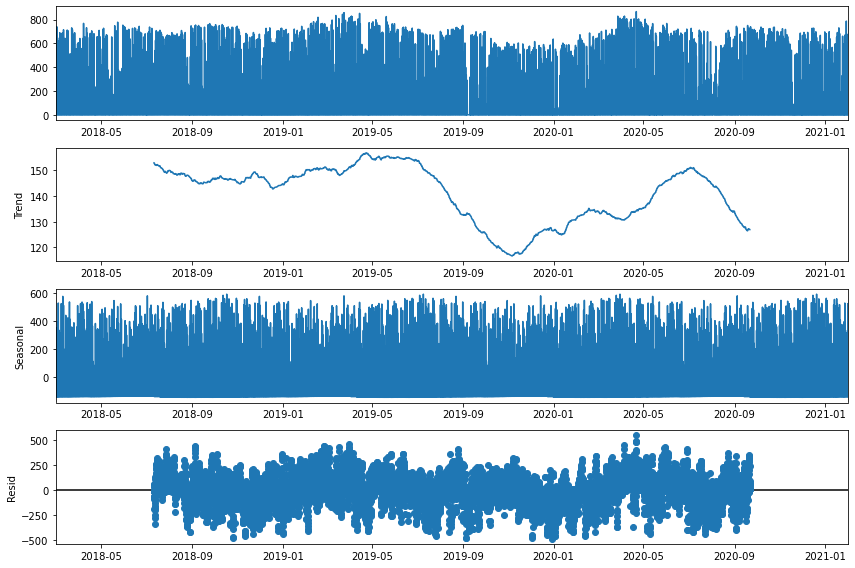

In [41]:
plt.rcParams['figure.figsize'] = [12, 8]


ss = seasonal_decompose(dangjin_energy, model='additive', period=24*265)
ss.plot()
plt.show()

In [44]:
dangjin_energy.to_csv('dangjin_csv')